<a href="https://colab.research.google.com/github/s-joshid/Transporter_proj/blob/main/tcDomsLabPLotsDuplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(
    #filepath
    '/content/drive/MyDrive/NPacSearchResults.tcDoms.domblout.tab',
    engine='python',
    #what you want to separate on; space sepration here
    sep='\s+',
    skiprows=[0, 1, 2],
    skipfooter=10,
    #usecols returns subset of cols
    usecols=[0,5,3],
    #names what col names you want to use
    names=['target_name' , 'qlen', 'query_name']
    )
df

,target_name,qlen,query_name
0,4.C.1.TD000001.0,434,D1PA_S30C1_TRINITY_DN1771826_c1_g5_i1_2
1,4.C.1.TD000002.0,454,D1PA_S30C1_TRINITY_DN1771826_c1_g5_i1_2
2,1.A.46.TD000001.0,295,D1PA_S30C1_TRINITY_DN1771825_c1_g2_i1_3
3,1.A.11.TD000001.0,405,D1PA_S30C1_TRINITY_DN1771902_c7_g1_i1_3
4,1.A.11.TD000002.0,409,D1PA_S30C1_TRINITY_DN1771902_c7_g1_i1_3
...,...,...,...
1389293,3.A.10.TD000001.0,651,D1PA_S24C1_TRINITY_DN2788333_c7_g2_i1_1
1389294,9.B.87.TD000001.0,38,D1PA_S24C1_TRINITY_DN2821495_c4_g1_i1_2
1389295,9.B.87.TD000001.0,38,D1PA_S24C1_TRINITY_DN2821495_c4_g1_i1_2
1389296,9.B.87.TD000001.0,38,D1PA_S24C1_TRINITY_DN2821495_c4_g1_i1_2


In [ ]:
# add transporter class to dataframe

processed_df = df.join(df['target_name'].str.split('.', expand=True))
processed_df = processed_df.rename(columns={
    0: 'transporter_class', 1: 'transporter_subclass', 2: 'transporter_family', 3: 'subfamiliy', 4: 'substrate'
})
#map: key, value pair
processed_df['class_name'] = processed_df['transporter_class'].astype(int).map({
    1: 'Channels/pores', 2: 'Electrochemical Potential-driven', 3: 'Primary Active Transporter', 4: 'Group Translocators', 5: 'Accessory Factors', 6: 'N/a', 7: 'N.a', 8: 'Accessory Factors', 9: 'Incompletely Characterized'
})

processed_df


<ipython-input-6-a794f0904b08>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Domains Categorized by Transporter Class')

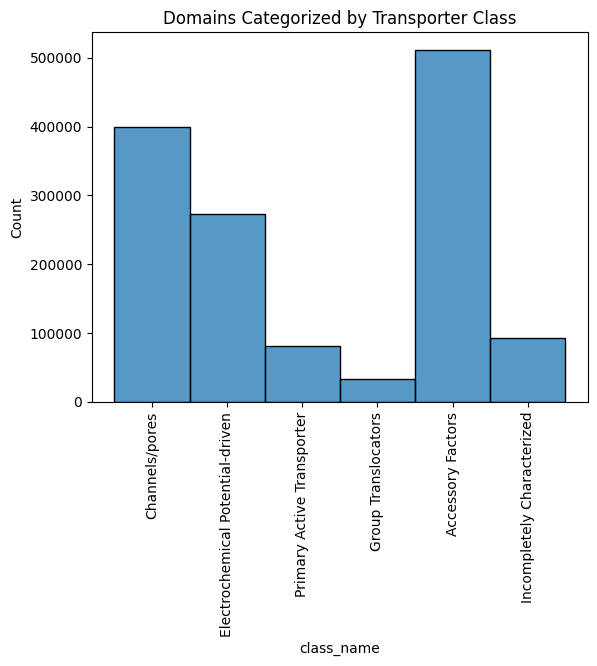

In [ ]:
# plot barplot of transporter class frequencies

plot_df = processed_df.sort_values('transporter_class')

plot = sns.histplot(data=plot_df, x='class_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Domains Categorized by Transporter Class')



7


<ipython-input-23-2ff947203db0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Channel/pores Transporter Proteins')

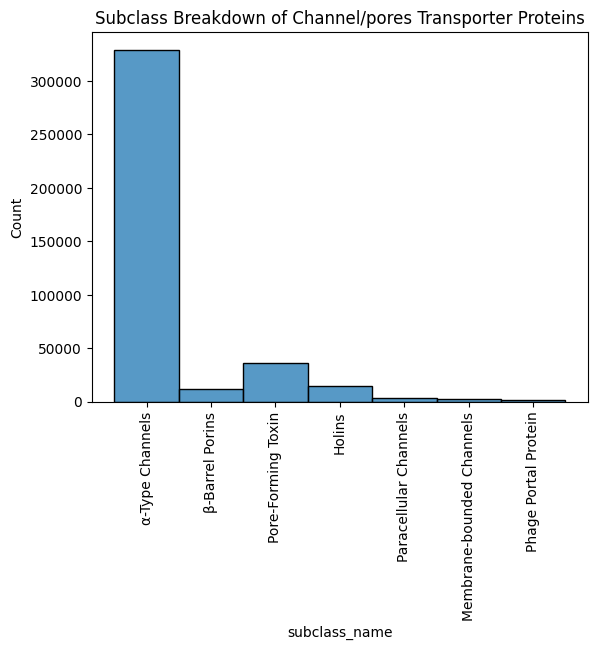

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "1"].sort_values('transporter_subclass')
#print(plot_df1)
print(plot_df1['transporter_subclass'].nunique())
#map: key, value pair
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
    'A': 'α-Type Channels', 'B': 'β-Barrel Porins', 'C': 'Pore-Forming Toxin',  'E' : 'Holins',  'H' : 'Paracellular Channels', 'I' : 'Membrane-bounded Channels', 'W' : 'Phage Portal Protein'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Channel/pores Transporter Proteins')

2


<ipython-input-26-db03b44cfebe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Electrochemical Potential-driven Transporters')

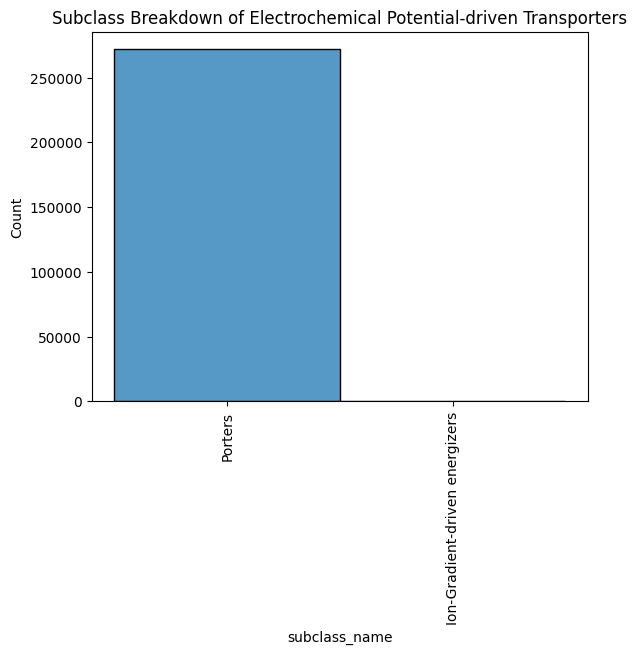

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "2"].sort_values('transporter_subclass')
#print(plot_df1)
print(plot_df1['transporter_subclass'].nunique())
#map: key, value pair
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
    'A': 'Porters', 'C': 'Ion-Gradient-driven energizers'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Electrochemical Potential-driven Transporters')

['A' 'D' 'E']


<ipython-input-32-28a4d28007eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Primary Active Transporters')

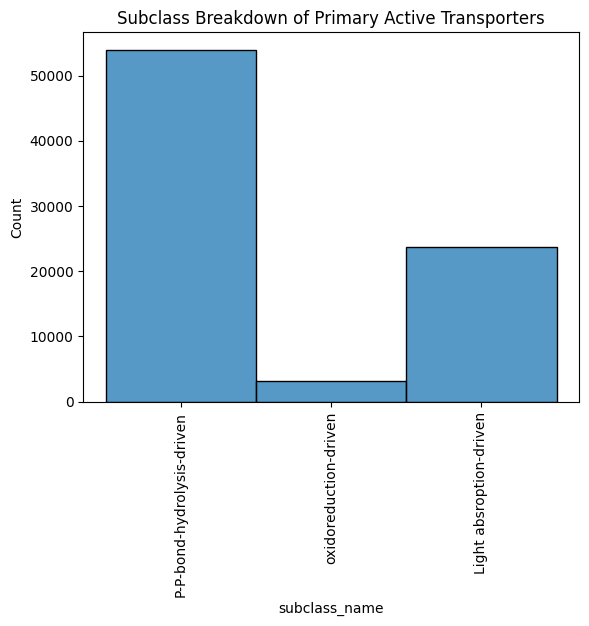

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "3"].sort_values('transporter_subclass')
print(plot_df1['transporter_subclass'].unique())
#map: key, value pair
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
   'A': 'P-P-bond-hydrolysis-driven', 'D': 'oxidoreduction-driven', 'E' : 'Light absroption-driven'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Primary Active Transporters')

['A' 'B' 'C' 'D' 'F' 'H']


<ipython-input-35-95c810215699>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Group Translocators')

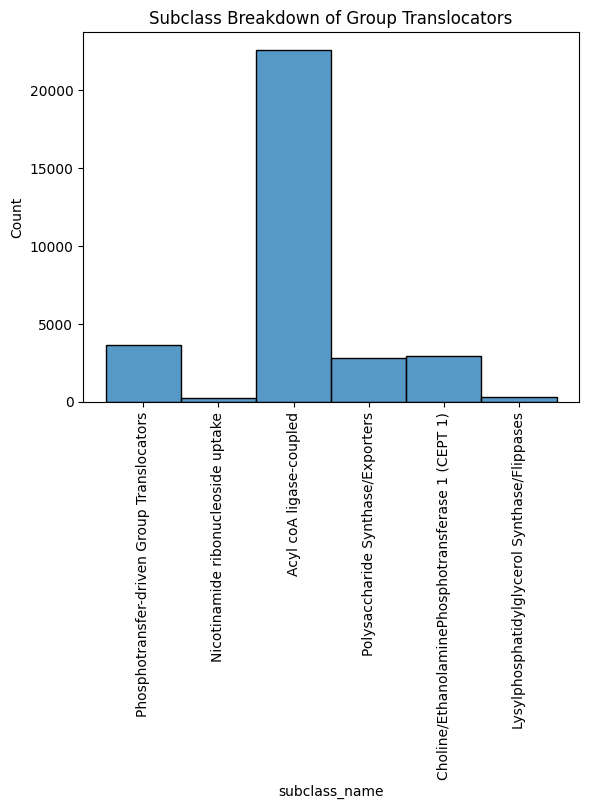

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "4"].sort_values('transporter_subclass')
print(plot_df1['transporter_subclass'].unique())
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
   'A': 'Phosphotransfer-driven Group Translocators', 'B': 'Nicotinamide ribonucleoside uptake', 'C' : 'Acyl coA ligase-coupled', 'D' : 'Polysaccharide Synthase/Exporters', 'F' : 'Choline/EthanolaminePhosphotransferase 1 (CEPT 1)', 'H' : 'Lysylphosphatidylglycerol Synthase/Flippases'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Group Translocators')


['A' 'B']


<ipython-input-41-3886bb537d52>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Transmembrane electron carriers')

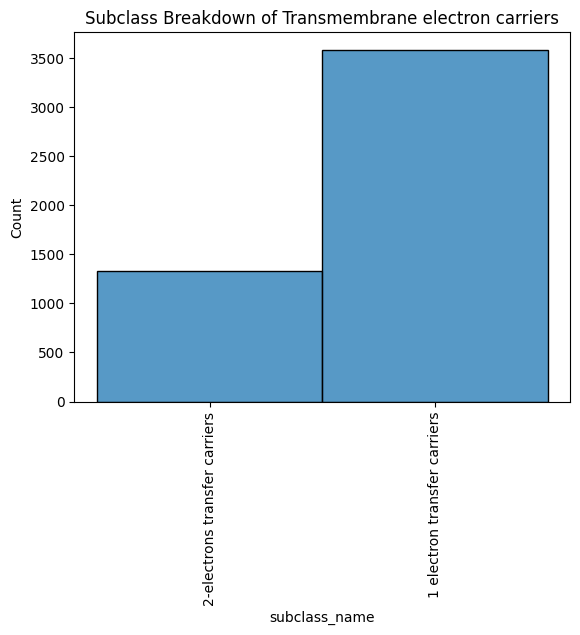

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "5"].sort_values('transporter_subclass')
print(plot_df1['transporter_subclass'].unique())
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
   'A': '2-electrons transfer carriers', 'B': '1 electron transfer carriers'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Transmembrane electron carriers')

['A' 'B']


<ipython-input-47-ee804dc73a00>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Accessory Factors Involved in Transport')

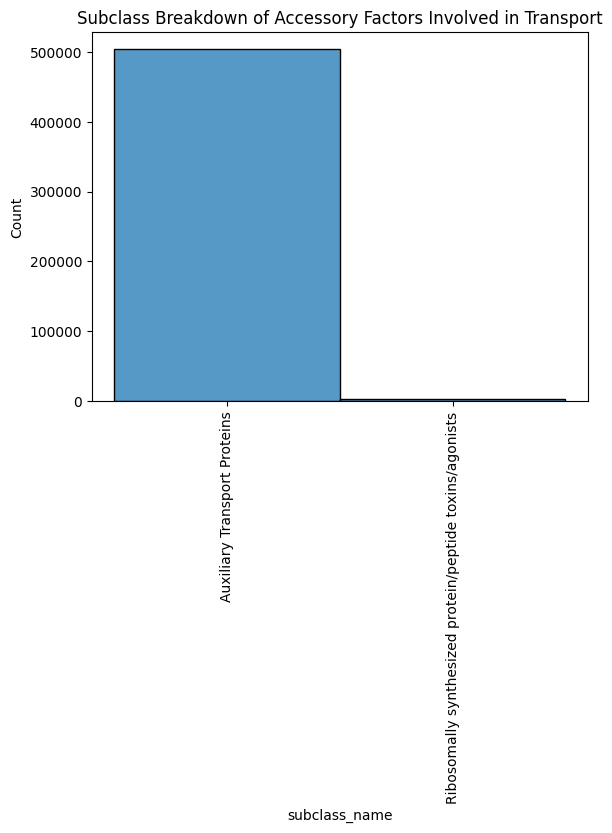

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "8"].sort_values('transporter_subclass')
print(plot_df1['transporter_subclass'].unique())
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
   'A': 'Auxiliary Transport Proteins', 'B': 'Ribosomally synthesized protein/peptide toxins/agonists'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Accessory Factors Involved in Transport')


['A' 'B']


<ipython-input-48-6c98229d668a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'Subclass Breakdown of Incompletely Characterized Transport Systems')

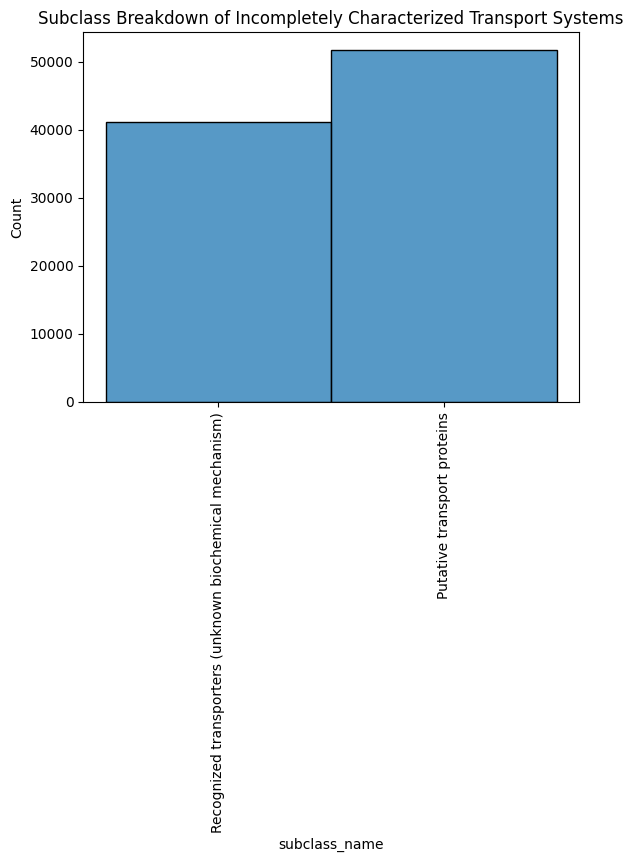

In [ ]:
plot_df1 = processed_df.loc[processed_df['transporter_class'] == "9"].sort_values('transporter_subclass')
print(plot_df1['transporter_subclass'].unique())
plot_df1['subclass_name'] = plot_df1['transporter_subclass'].map({
   'A': 'Recognized transporters (unknown biochemical mechanism)', 'B': 'Putative transport proteins'})
plot = sns.histplot(data=plot_df1, x='subclass_name')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set_title('Subclass Breakdown of Incompletely Characterized Transport Systems')